## Hotel Booking Demand Analysis
This dataset is aquired from **Kaggle** and contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

### Dataset Link:
https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?sort=votes

## Objective:
The objective of this Notebook is to analyze the **Demand of Hotel Booking** using the given dataset and gather findings that are presentable to the **Stakeholders** in order to make(suggest) the improvements(data-driven decisions) in their Hotel Management. Technically, **Exploratory Data Analysis**, commonly called EDA, will be performed in this Notebook using **Python** Visualization libraries like Matplotlib, Seaborn.

## Data Loading

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [102]:
df = pd.read_excel('hotel_booking_workbook.xlsx')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [103]:
# view column names to check the features that may be suitable(or meaningful) combination in visualizations
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [104]:
# always make a copy of the original dataset, you don't need to load the dataset again and again(if it's large enough). 
df1=df.copy()
# no. of columns BEFORE dropping irrelevant features(columns)
len(df1.columns)

36

## Data Preprocessing

### Drop irrelavant columns

Some of the columns just doesn't make sense for our analysis. So removing them before starting the further exploration as it well save the memory.  

The columns **name, email**, and **phone-number** may be useful for promotion of business or any new exciting offers. So if you want to keep them, go for it. No worries :)

In [105]:
df1=df1.drop(columns=['name', 'email',
       'phone-number', 'credit_card'], axis=1)
# no. of columns AFTER dropping irrelevant features(columns)
len(df1.columns)

32

Looks like it worked.

### Checking Missing values

Let's check the count and percentages of Missing values

In [106]:
# limiting to the only top 5 columns if your last column (in my case, 'hotel') has more than(or atleast) one missing value, 
# please adjust your indexing(in my case, '[:5]') accordingly.

# count
df1.isnull().agg('sum').sort_values(ascending=False)[:5]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

In [107]:
# if you want to view the percentages
df1.isnull().agg('sum').sort_values(ascending=False)[:5]/df1.shape[0]

company               0.943069
agent                 0.136862
country               0.004087
children              0.000034
reserved_room_type    0.000000
dtype: float64

As you can see, Our dataset having 4 columns, contain missing values.

### Handling Missing values

Let's explore one be one and fix them.

#### Company column

In [108]:
df1[df1.company.notna()]['company']

18        110.0
218       110.0
219       110.0
220       110.0
295       113.0
          ...  
119119    451.0
119122    451.0
119123    451.0
119124     72.0
119248    485.0
Name: company, Length: 6797, dtype: float64

In [109]:
# percentage of existing records
(df1.company.notna().sum()/df1.shape[0])*100

5.693106625345506

The company columns represent itself with decimal(float) number and as we have seen above, almost  94% of them are missing. So, dropping it will be better as it doesn't contribute much to the dataset. That means most of the cutomers made booking from other sources or themselves.

In [110]:
df1 = df1.drop('company', axis=1)

#### Agent feature(column)

In [111]:
df1[df1.agent.notna()]['agent']

3         304.0
4         240.0
5         240.0
7         303.0
8         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 103050, dtype: float64

In [112]:
df1.agent.notna().sum()/df1.shape[0]

0.8631376162157635

This also contain decimal values and it contributes almost 86% in the dataset. Dropping it isn't a good option.   
However, we can fill theses missing values using the Mode(most frequent value) of the same column. Because the values are in decimal but it's not kind of the continuous variable instead categorical(like agent number). It suggests that most of the bookings were made by the agents, so replacing missing values with the agent having maximum count.

In [113]:
# get the mode
mode=df1.agent.mode()[0]

# other ways to get the mode (just change the column name)
# df1.agent.mode().values[0]
# df1.agent.value_counts().sort_values(ascending=False).index[0]

# fill missing values with mode
df1.agent = df1.agent.fillna(mode,)

In [114]:
df.agent.unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

#### Country column

In [115]:
df1.country.unique()
df1.country.notna().sum()/df1.shape[0]

0.9959125554904096

As it can be seen that the country column has less than 1% records missing. 
Replacing it with Mode(most repeated country value).

In [116]:
df1.country.mode()[0]

'PRT'

In [117]:
# get the mode
mode=df1.country.mode()[0]

# fill missing values with mode
df1.country = df1.country.fillna(mode,)

#### Children column

Now we are left with only the 'children' column.   
We have two options here, drop those record as it won't affect our dataset or replace with the mode again.

In [118]:
df1.children.isna().sum()

4

In [119]:
# dropping children missing values
df1.dropna(inplace=True)

# checking if the records dropped successfully
df1.children.isna().sum()

0

In [120]:
# final check of missing values in the entire dataset
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

**We are done with the Missing values till here.**

In [121]:
# Let's first explore the descriptive statistics
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,76.062285,2.321227,101.833541,0.062520,0.571340
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,106.324303,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [122]:
# Looking at the minimum values for the adults, children, and babies columns
df1[(df1['adults']+df1['children']+df1['babies']+df1['is_canceled'])==0][['adults', 'children', 'babies', 'is_canceled']].head()

,adults,children,babies,is_canceled
2224,0,0.0,0,0
2409,0,0.0,0,0
3181,0,0.0,0,0
3684,0,0.0,0,0
3708,0,0.0,0,0


The above result just doesn't make sense. As the user has not cancelled the booking but no adults, children or babies in
the hotel.

In [123]:
# fixing the above inconsistency
df1=df1.loc[~((df1['adults']+df1['children']+df1['babies']+df1['is_canceled'])==0)]

In [124]:
df1.shape

(119231, 31)

In [125]:
# handling adr column as the minium value shows in negative
df1[df1.adr<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,2,No Deposit,273.0,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


The average daily rating(adr) is calculated when the user makes a booking(and maybe checks in) or the revenue made by the hotel on average per booking. So, the adr cannot be less than 0 and this record can be neglected.

In [126]:
df1=df1.loc[df1.adr>=0]

In [127]:
# fixing data types if any
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119230 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119230 non-null  object        
 1   is_canceled                     119230 non-null  int64         
 2   lead_time                       119230 non-null  int64         
 3   arrival_date_year               119230 non-null  int64         
 4   arrival_date_month              119230 non-null  object        
 5   arrival_date_week_number        119230 non-null  int64         
 6   arrival_date_day_of_month       119230 non-null  int64         
 7   stays_in_weekend_nights         119230 non-null  int64         
 8   stays_in_week_nights            119230 non-null  int64         
 9   adults                          119230 non-null  int64         
 10  children                        119230 non-null  float64

In [128]:
# function that will change datatype of a column to another
def change_dtype(df, col_name, type_to_convert):
    df[col_name] = df[col_name].astype(type_to_convert)

In [129]:
# fixing object type columns
obj_cols_to_change_types = ['hotel', 'is_canceled', 'meal', 'country', 'market_segment', 'distribution_channel', 
                            'deposit_type', 'customer_type', 'reservation_status', 'assigned_room_type', 
                            'reserved_room_type',]
for i in obj_cols_to_change_types:
    change_dtype(df1, i, 'category')

In [130]:
change_dtype(df1, 'arrival_date_month', 'category')

In [131]:
# if you are wondering why to change datatypes?
# check the memory in the above 'df1.info' output and this one's.
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119230 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119230 non-null  category      
 1   is_canceled                     119230 non-null  category      
 2   lead_time                       119230 non-null  int64         
 3   arrival_date_year               119230 non-null  int64         
 4   arrival_date_month              119230 non-null  category      
 5   arrival_date_week_number        119230 non-null  int64         
 6   arrival_date_day_of_month       119230 non-null  int64         
 7   stays_in_weekend_nights         119230 non-null  int64         
 8   stays_in_week_nights            119230 non-null  int64         
 9   adults                          119230 non-null  int64         
 10  children                        119230 non-null  float64

In [132]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,119230.0,104.106517,106.880056,0.0,18.0,69.00,161.0,737.0
arrival_date_year,119230.0,2016.156555,0.707446,2015.0,2016.0,2016.00,2017.0,2017.0
arrival_date_week_number,119230.0,27.163004,13.601492,1.0,16.0,28.00,38.0,53.0
arrival_date_day_of_month,119230.0,15.798138,8.780809,1.0,8.0,16.00,23.0,31.0
stays_in_weekend_nights,119230.0,0.927007,0.995118,0.0,0.0,1.00,2.0,19.0
stays_in_week_nights,119230.0,2.499035,1.897263,0.0,1.0,2.00,3.0,50.0
adults,119230.0,1.858802,0.575757,0.0,2.0,2.00,2.0,55.0
children,119230.0,0.104026,0.398804,0.0,0.0,0.00,0.0,10.0
babies,119230.0,0.007959,0.097501,0.0,0.0,0.00,0.0,10.0
is_repeated_guest,119230.0,0.031502,0.174671,0.0,0.0,0.00,0.0,1.0


Alot of outliers can be seen in the above table. Let's check distribution.

AxesSubplot(0.125,0.125;0.775x0.755)


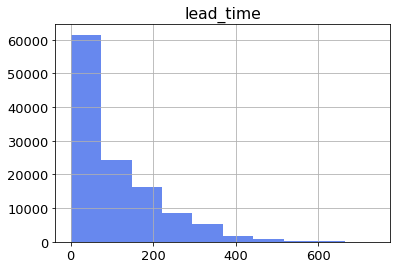

AxesSubplot(0.125,0.125;0.775x0.755)


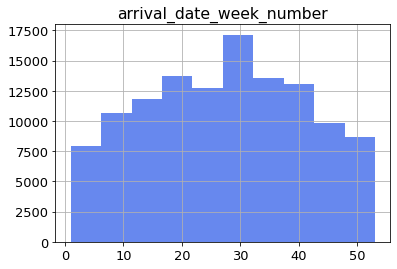

AxesSubplot(0.125,0.125;0.775x0.755)


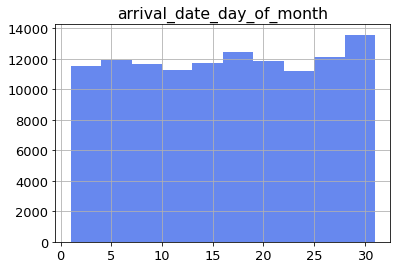

AxesSubplot(0.125,0.125;0.775x0.755)


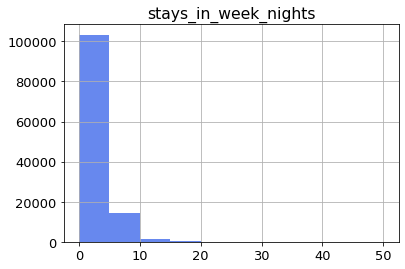

AxesSubplot(0.125,0.125;0.775x0.755)


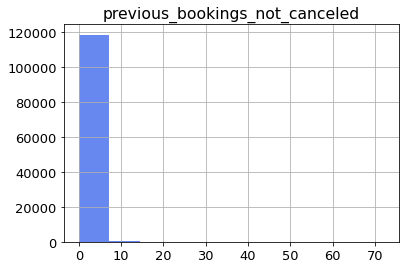

AxesSubplot(0.125,0.125;0.775x0.755)


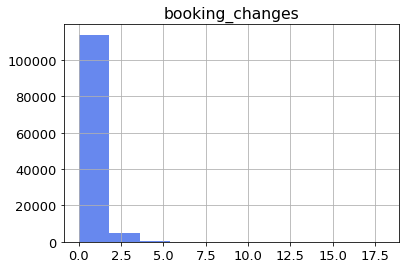

AxesSubplot(0.125,0.125;0.775x0.755)


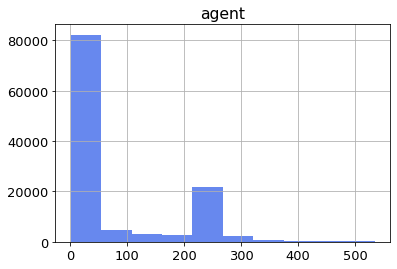

AxesSubplot(0.125,0.125;0.775x0.755)


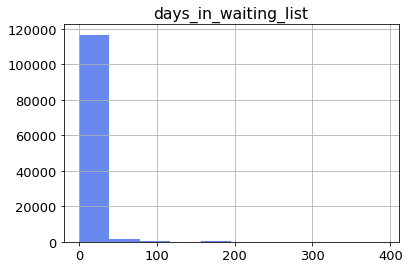

AxesSubplot(0.125,0.125;0.775x0.755)


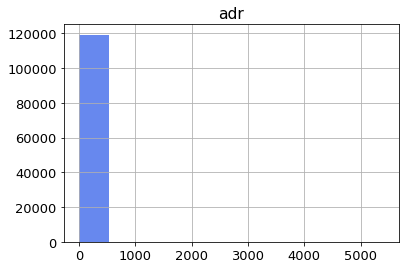

In [133]:
# all numerical columns distribution
cols=df1.describe().columns.to_list()
for i in cols:
    # only columns having more than 20 unique categories (Continuous variable)
    if df[i].nunique()>20:
        print(df1[i].hist())
        plt.title(i)
        plt.show()

### Handling Outliers

In [156]:
df1.loc[df1.lead_time>600, 'lead_time']=500

In [168]:
df1.lead_time.mean()

103.85033967961084

In [151]:
# similar way other can be handled
df1.loc[df1['stays_in_week_nights']>15, 'stays_in_week_nights']=10

In [167]:
df1.loc[df1.days_in_waiting_list>100, 'days_in_waiting_list']=int(df1.days_in_waiting_list.mean())

In [174]:
df1.loc[df1.adr>500, 'adr'] = 500

In [176]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,119230.0,103.850340,105.813931,0.0,18.0,69.00,161.0,500.0
arrival_date_year,119230.0,2016.156555,0.707446,2015.0,2016.0,2016.00,2017.0,2017.0
arrival_date_week_number,119230.0,27.163004,13.601492,1.0,16.0,28.00,38.0,53.0
arrival_date_day_of_month,119230.0,15.798138,8.780809,1.0,8.0,16.00,23.0,31.0
stays_in_weekend_nights,119230.0,0.927007,0.995118,0.0,0.0,1.00,2.0,19.0
stays_in_week_nights,119230.0,2.485440,1.793938,0.0,1.0,2.00,3.0,15.0
adults,119230.0,1.858802,0.575757,0.0,2.0,2.00,2.0,55.0
children,119230.0,0.104026,0.398804,0.0,0.0,0.00,0.0,10.0
babies,119230.0,0.007959,0.097501,0.0,0.0,0.00,0.0,10.0
is_repeated_guest,119230.0,0.031502,0.174671,0.0,0.0,0.00,0.0,1.0


## Data Visualization

<AxesSubplot:>

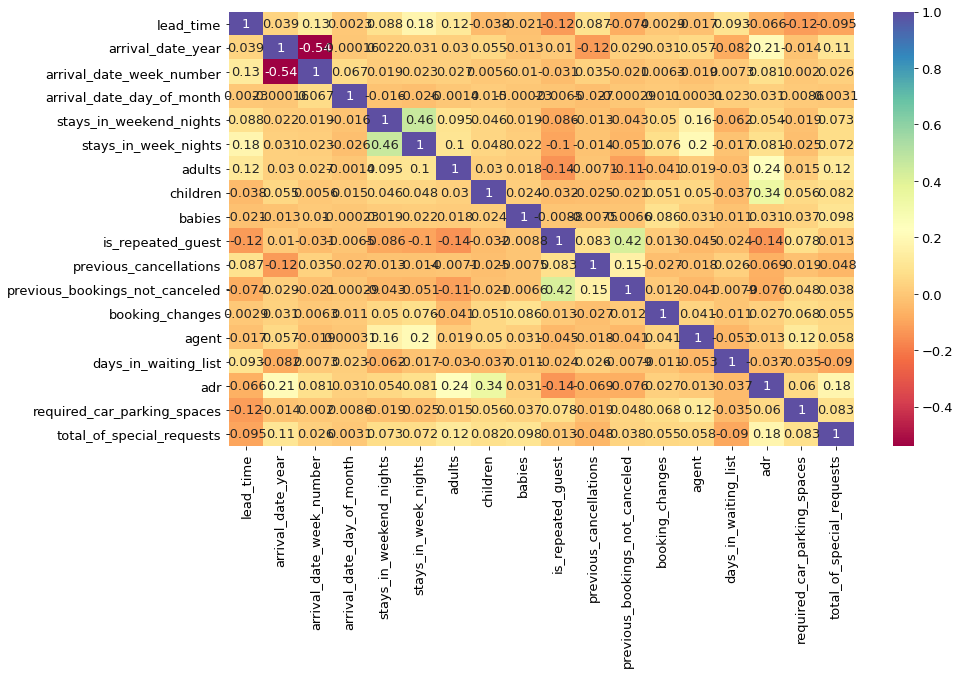

In [177]:
plt.figure(figsize=(14, 8))

# Compute the correlation matrix
corr = df1.corr()
sns.heatmap(corr, annot=True,cmap='Spectral')

Stay in week and weekendnights seems to corelate almost 50%. Rest are less than 50%.

In [178]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,...,4,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### Which hotel people prefer the most?

In [179]:
# overall bookings
df1['hotel'].value_counts()

City Hotel      79182
Resort Hotel    40048
Name: hotel, dtype: int64

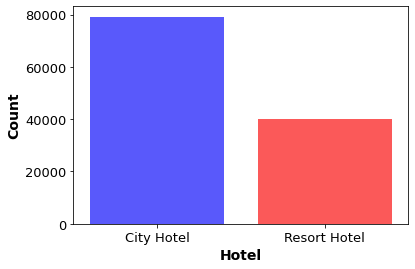

In [180]:
ax = sns.countplot(x='hotel', data=df1, order=['City Hotel', 'Resort Hotel'], saturation=0.95, palette='seismic')
plt.xlabel('Hotel',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks(fontsize=13)
plt.yticks()
plt.show()

Most people prefered City hotel.

#### Cancellation ratio of hotels

In [181]:
# hotel wise cancellation ratio
pd.crosstab(df1['hotel'], df1['is_canceled']).T

hotel,City Hotel,Resort Hotel
is_canceled,,
0,46084,28926
1,33098,11122


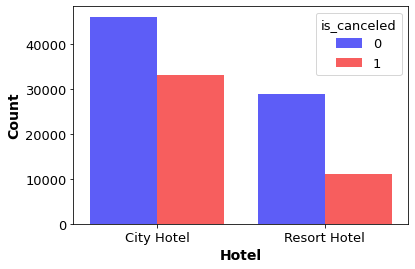

In [182]:
ax = sns.countplot(x='hotel', data=df1, hue='is_canceled',order=['City Hotel', 'Resort Hotel'], saturation=0.90, palette='seismic')
plt.xlabel('Hotel',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks(fontsize=13)
plt.yticks()
plt.show()

Many people made reservation in city hotel initially but almost half of them canceled it.  
The city hotel Cancelations are more than the successsful Bookings of the Resort hotel.

#### How many bookings were cancelled?

In [183]:
# cancellation overall
df1.is_canceled.value_counts()

0    75010
1    44220
Name: is_canceled, dtype: int64

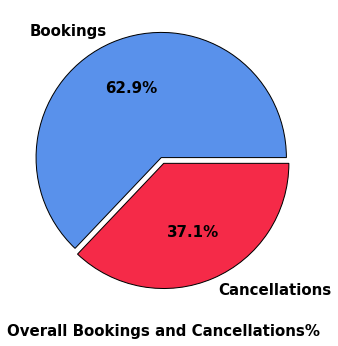

In [184]:
explode = (0.05, 0)
plt.figure(figsize=(14, 5))
colors= ['#5991eb', '#f52a48']
ax=plt.pie(data=df1, x=df1.is_canceled.value_counts().values ,
            labels = ['Bookings', 'Cancellations'], colors = colors 
            , autopct='%.1f%%', explode=explode, 
            wedgeprops = {"edgecolor" : "black",},
          textprops={'fontsize':15, 'weight':'bold'})

plt.xlabel('Overall Bookings and Cancellations%',fontsize=15,weight='bold')
plt.rcParams['font.size'] = 13.0
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.show()

Around 37% bookings were cancelled in both hotels.

#### From which country most people are?

In [185]:
# country

# showing top 5 countries from visitors belong to
df1.country.value_counts()[:5].to_frame()

,country
PRT,48980
GBR,12120
FRA,10402
ESP,8560
DEU,7285


In [186]:
country_df = df1.country.value_counts()[:15].to_frame()
countries_count=country_df.country.values
countries_name=country_df.index.values

In [187]:
# top 15 countries
fig = px.scatter_geo(data_frame=country_df, locations=countries_name, size=countries_count,
                     color='country', hover_data={'country':False}
                    )
fig.show()

Most people came from Portugal, following Great Britain(UK) and France.

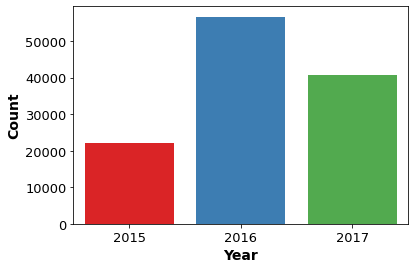

In [188]:
# arrival_date_year
ax = sns.countplot(x='arrival_date_year', data=df1, saturation=0.9, palette='Set1')
plt.xlabel('Year',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks()
plt.yticks()
plt.show()

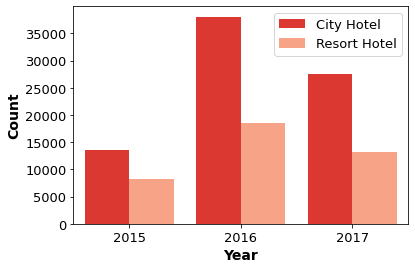

In [191]:
ax = sns.countplot(x='arrival_date_year', data=df1, hue='hotel', saturation=0.9, palette='Reds_r')
plt.xlabel('Year',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks()
plt.yticks()
plt.legend(loc='upper right',)
plt.show()

Most bookings were made in 2016.  
The number increased in 2016 but decreasing in 2017.

### Monthly Booking Trend overall

In [192]:
# arrival_date_month
df1.arrival_date_month.value_counts().reset_index()

,index,arrival_date_month
0,August,13859
1,July,12649
2,May,11780
3,October,11147
4,April,11084
5,June,10930
6,September,10501
7,March,9768
8,February,8055
9,November,6773


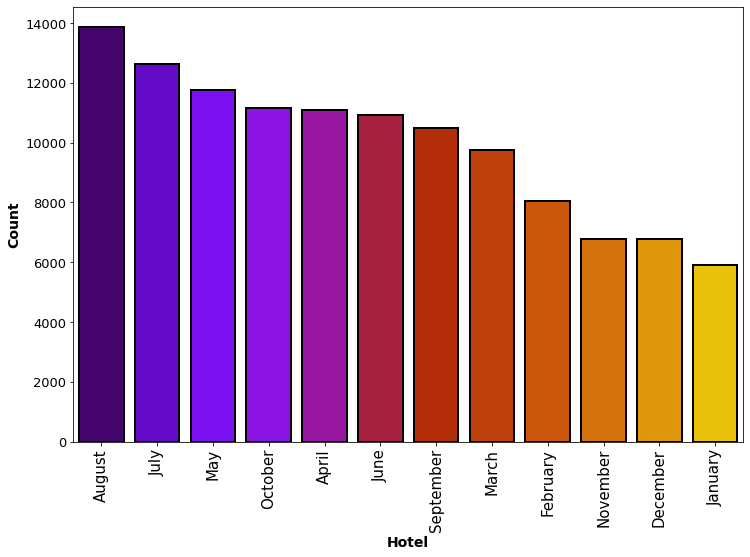

In [193]:
plt.figure(figsize=(12, 8))
month_order=df1.arrival_date_month.value_counts().index
ax = sns.countplot(x='arrival_date_month', data=df1, order=month_order, saturation=0.9, palette='gnuplot', lw=2,ec='black')
plt.xlabel('Hotel',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks(rotation=90, fontsize=15)
plt.yticks()
plt.show()

August and July seems to be the most busiest months.  
More than 12000 bookings were made in each of the months.  
While the lowest count is for January that is around 6000.

### Daily Trend overall

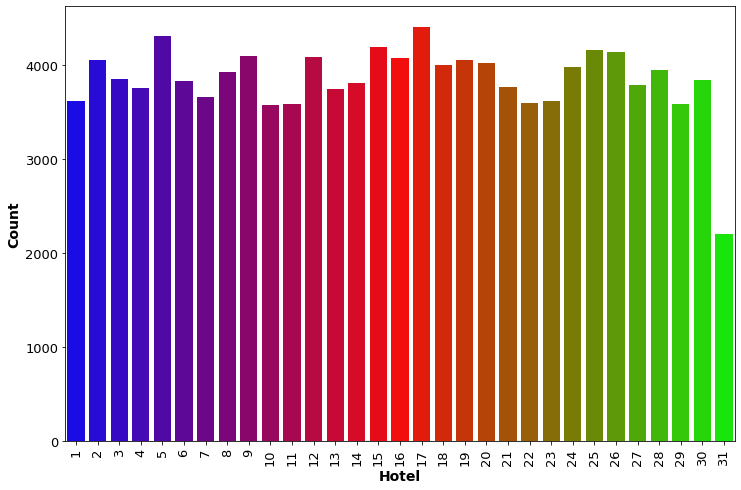

In [194]:
plt.figure(figsize=(12, 8))
day_order=df1.arrival_date_day_of_month.value_counts().index
ax = sns.countplot(x='arrival_date_day_of_month', data=df1, saturation=0.9, palette='brg',)
plt.xlabel('Hotel',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks(rotation=90)
plt.yticks()
plt.show()

No specific pattern according to the days but the least reservations on the last day of month.

### Weekend Night Stays

In [195]:
# stays_in_weekend_nights 
df1.stays_in_weekend_nights.value_counts()

0     51909
2     33273
1     30614
4      1847
3      1252
6       152
5        77
8        58
7        19
9        10
10        7
12        5
13        2
16        2
14        1
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

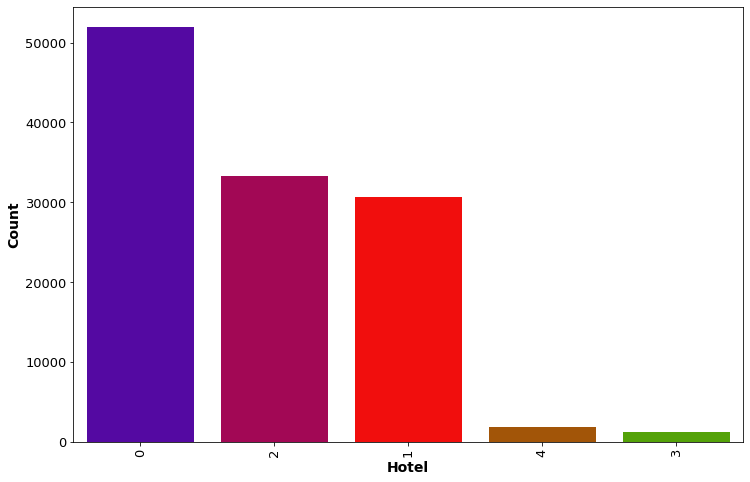

In [196]:
# stays_in_weekend_nights 
plt.figure(figsize=(12, 8))
stay_order=df1.stays_in_weekend_nights.value_counts().index[:5]
ax = sns.countplot(x='stays_in_weekend_nights', data=df1, order=stay_order,saturation=0.9, palette='brg',)
plt.xlabel('Hotel',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks(rotation=90)
plt.yticks()
plt.show()

A huge chunk of customers donot prefer staying in hotel on weekend nights. But some singles and couples do prefer.

### Week Night Stays

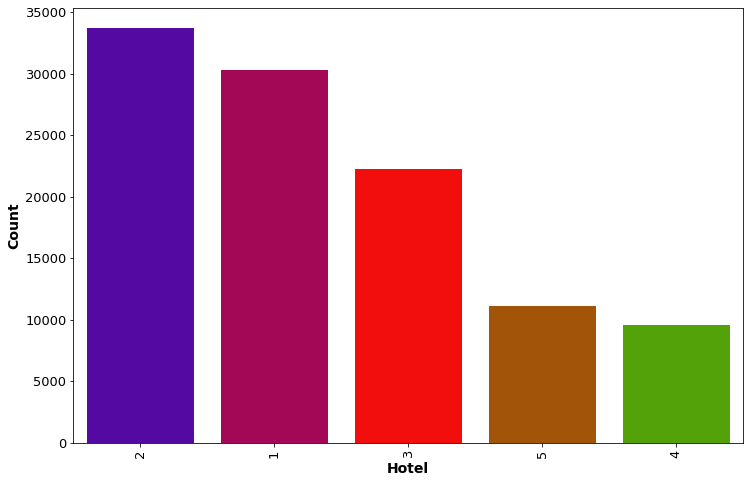

In [197]:
# stays_in_week_nights 
plt.figure(figsize=(12, 8))
stay_order=df1.stays_in_week_nights.value_counts().index[:5]
ax = sns.countplot(x='stays_in_week_nights', data=df1, order=stay_order,saturation=0.9, palette='brg',)
plt.xlabel('Hotel',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks(rotation=90)
plt.yticks()
plt.show()

This is interesting, Most couples prefer staying on week nights intead of weekend nights.  
Singles and others also like to stay on week nights in hotels.

### Meal Distribution

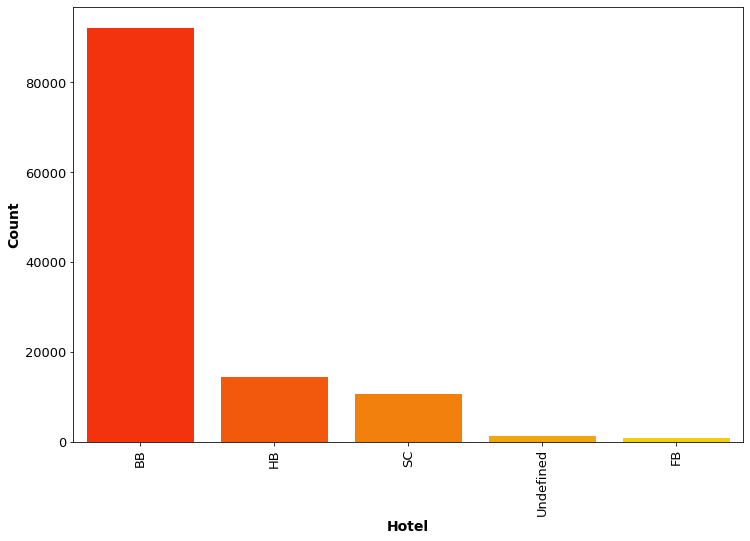

In [198]:
# meal
plt.figure(figsize=(12, 8))
stay_order=df1.meal.value_counts().index
ax = sns.countplot(x='meal', data=df1, order=stay_order,saturation=0.9, palette='autumn',)
plt.xlabel('Hotel',fontsize=14,weight='bold')
plt.ylabel('Count',fontsize=14,weight='bold')
plt.xticks(rotation=90)
plt.yticks()
plt.show()

BB is the most ordered meal in both hotels.

In [199]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Average Daily Rating Monthwise

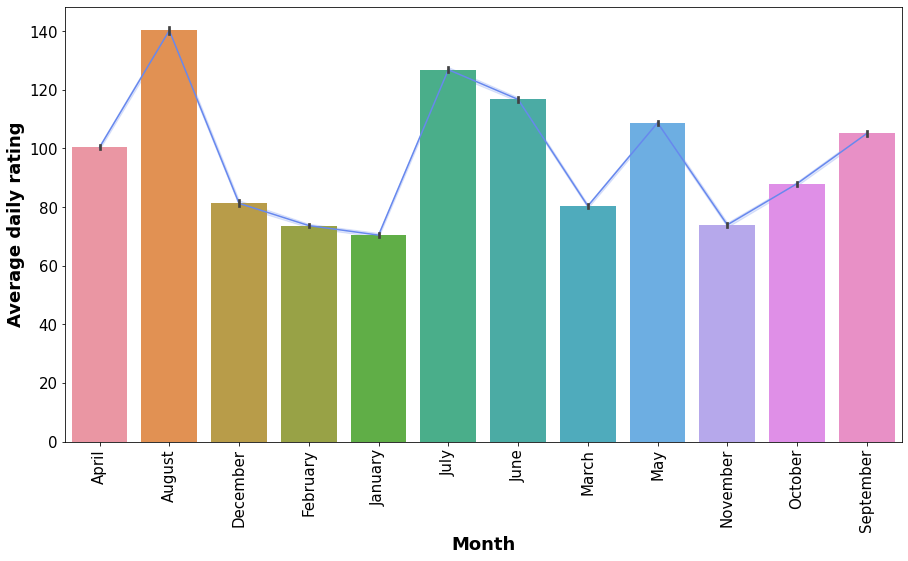

In [200]:
# adr
plt.figure(figsize=(15, 8))
ax = sns.lineplot(x='arrival_date_month', y='adr', data=df1,)
ax = sns.barplot(x='arrival_date_month', y='adr', data=df1,)
plt.xlabel('Month',fontsize=18,weight='bold')
plt.ylabel('Average daily rating',fontsize=18,weight='bold')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Average daily rating is low in the starting and the ending 3 months overall.  
In the mid of the year, from April to Sep, hotels maintain the average daily rating to 100. Several discounts or offers may be introd....

### Average Daily Rating According to Month and Hotel

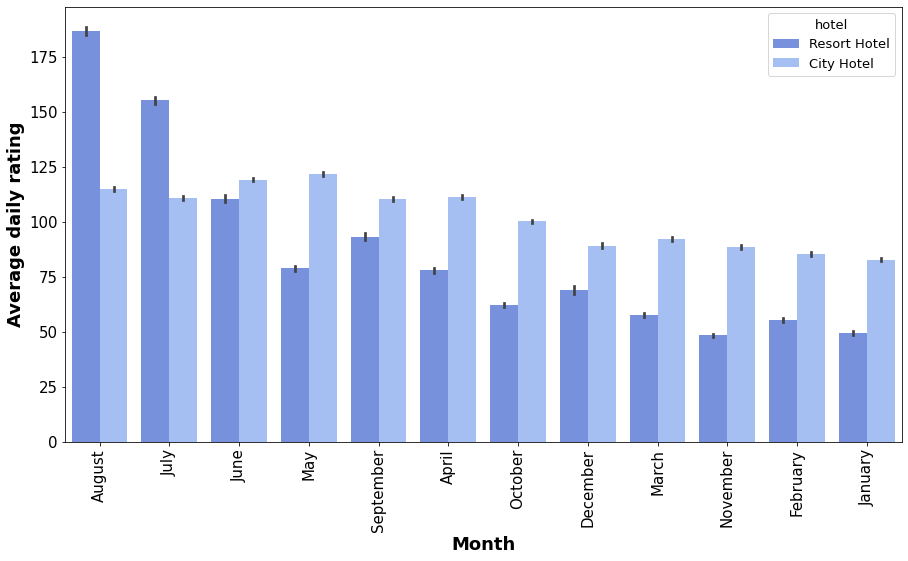

In [201]:
# monthly adr hotel wise
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='arrival_date_month', y='adr', hue='hotel', data=df1, 
                 color=sns.set_palette('coolwarm'),
                order=df1.groupby('arrival_date_month')['adr'].mean().sort_values(ascending=False).index,
                hue_order=['Resort Hotel', 'City Hotel']) 
plt.xlabel('Month',fontsize=18,weight='bold')
plt.ylabel('Average daily rating',fontsize=18,weight='bold')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Most bookings are in the mid of summer. The least in the starting of the year.

### Is Average Daily Rating improving over years?

In [202]:
# year-wise count
df1.arrival_date_year.value_counts()

2016    56636
2017    40630
2015    21964
Name: arrival_date_year, dtype: int64

In [203]:
df1.arrival_date_year.dtype

dtype('int64')

In [204]:
# keeping only records having adr atleast with year specific
df_2015=df1[(df1.arrival_date_year==2015) & (df1.adr > 0)]
df_2016=df1[(df1.arrival_date_year==2016) & (df1.adr > 0)]
df_2017=df1[(df1.arrival_date_year==2017)& (df1.adr > 0)]

In [205]:
df_2015['arrival_date_month'].value_counts()

September    5009
October      4824
August       3790
December     2795
July         2714
November     2273
April           0
February        0
January         0
June            0
March           0
May             0
Name: arrival_date_month, dtype: int64

In [206]:
# remove unused categories(some months have no data)
df_2015['arrival_date_month'].cat.remove_unused_categories().value_counts()
# df_2015['arrival_date_month'].value_counts()[:6]

September    5009
October      4824
August       3790
December     2795
July         2714
November     2273
Name: arrival_date_month, dtype: int64

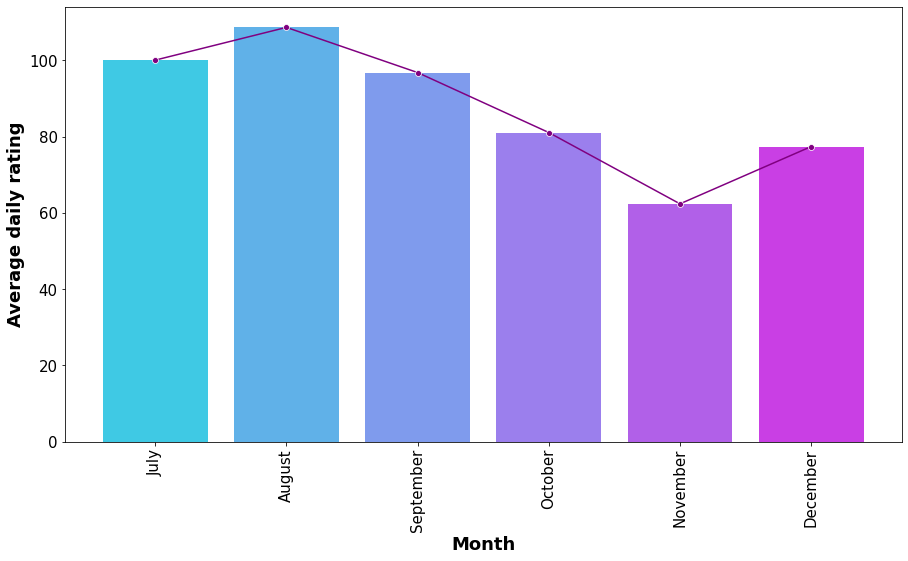

In [207]:
# 2015
plt.figure(figsize=(15, 8))

x_val = df_2015.groupby('arrival_date_month')['adr'].mean().dropna().index.to_list()
order=[2,0,5,4,3,1]
x_val = [x_val[i] for i in order]
y_val = df_2015.groupby('arrival_date_month')['adr'].mean().dropna().values
y_val = [y_val[i] for i in order]

ax = sns.barplot(x=x_val, y=y_val, palette='cool')
ax = sns.lineplot(x=x_val, y=y_val, marker="o", color='purple')

plt.xlabel('Month',fontsize=18,weight='bold')
plt.ylabel('Average daily rating',fontsize=18,weight='bold')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [208]:
# verifying results with the above graph
df_2015.groupby('arrival_date_month')['adr'].mean().dropna()

arrival_date_month
August       108.658472
December      77.392268
July         100.066345
November      62.363304
October       81.070612
September     96.806277
Name: adr, dtype: float64

In [209]:
print(df_2016.groupby('arrival_date_month')['adr'].mean().dropna().index.to_list())

['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']


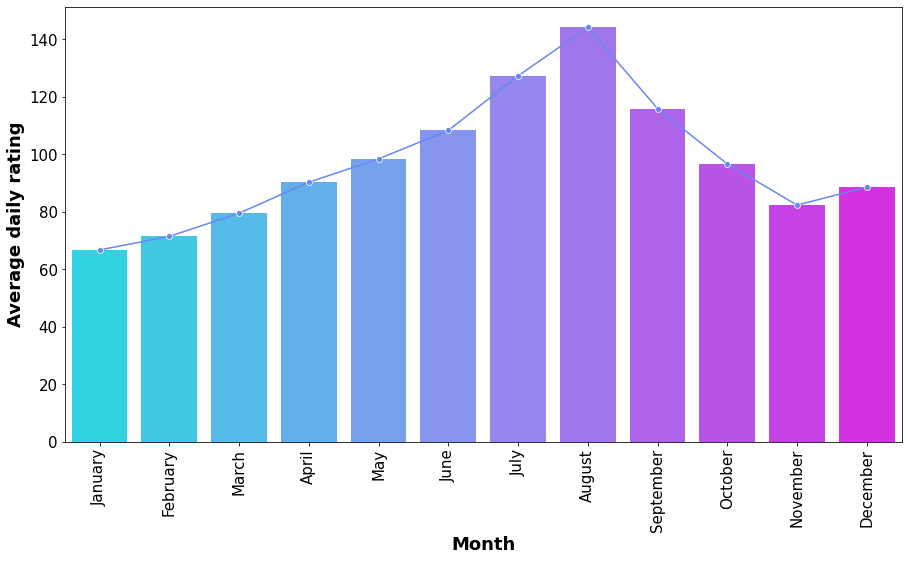

In [210]:
# 2016
plt.figure(figsize=(15, 8))

x_val = df_2016.groupby('arrival_date_month')['adr'].mean().dropna().index.to_list()
order = [4,3,7,0,8,6,5,1,11,10,9,2]
x_val = [x_val[i] for i in order]
y_val = df_2016.groupby('arrival_date_month')['adr'].mean().dropna().values
y_val = [y_val[i] for i in order]

ax = sns.lineplot(x=x_val, y=y_val, marker='o')
ax = sns.barplot(x=x_val, y=y_val, palette='cool')

plt.xlabel('Month',fontsize=18,weight='bold')
plt.ylabel('Average daily rating',fontsize=18,weight='bold')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [211]:
df_2016.groupby('arrival_date_month')['adr'].mean()

arrival_date_month
April         90.274170
August       144.182899
December      88.583306
February      71.409180
January       66.696148
July         127.305320
June         108.307624
March         79.469618
May           98.410727
November      82.318897
October       96.638568
September    115.905225
Name: adr, dtype: float64

In [212]:
print(df_2017.groupby('arrival_date_month')['adr'].mean().dropna().index.to_list())

['April', 'August', 'February', 'January', 'July', 'June', 'March', 'May']


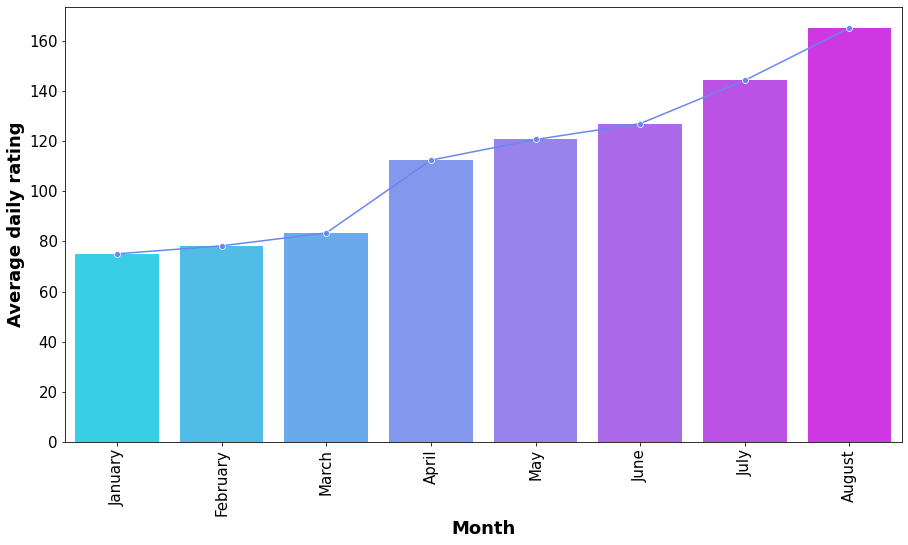

In [213]:
# 2017
plt.figure(figsize=(15, 8))

x_val = df_2017.groupby('arrival_date_month')['adr'].mean().dropna().index.to_list()
order=[3,2,6,0,7,5,4,1]
x_val = [x_val[i] for i in order]
y_val = df_2017.groupby('arrival_date_month')['adr'].mean().dropna().values
y_val = [y_val[i] for i in order]

ax = sns.lineplot(x=x_val, y=y_val, marker='o')
ax = sns.barplot(x=x_val, y=y_val, palette='cool')

plt.xlabel('Month',fontsize=18,weight='bold')
plt.ylabel('Average daily rating',fontsize=18,weight='bold')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [214]:
df_2017.groupby('arrival_date_month')['adr'].mean().dropna()

arrival_date_month
April       112.443496
August      165.187507
February     78.258063
January      75.075040
July        144.241270
June        127.005789
March        83.416412
May         120.670117
Name: adr, dtype: float64

In [215]:
df_2015['adr'].mean()

89.57935622518086

In [216]:
df_2016['adr'].mean()

99.86972870232502

In [217]:
df_2017['adr'].mean()

115.94998359065833

Yes, Average daily rating is improving yearly.  
In 2015 and 2016, it is almost 90 and 100 respectively, while in 2017 it is nearly 120.  
The highest bookings are in the month of August and it's growing averge daily rating can also be seen in the above graphs over years.  
The bookings count goes down after August and again start increasing from December.  
The first 6 months data from 2015 and last 4 months from 2017 isn't available. Otherwise result might be better.

In [218]:
# checking the bookings for 2017
df1[df1.arrival_date_year==2017]['arrival_date_month'].value_counts()

May          6305
April        5658
June         5640
July         5310
March        4949
August       4925
February     4169
January      3674
December        0
November        0
October         0
September       0
Name: arrival_date_month, dtype: int64

### Is Desposit_type having any effect on Cancellations?

In [226]:
df1.groupby('deposit_type')['is_canceled'].agg("count")

deposit_type
No Deposit    104481
Non Refund     14587
Refundable       162
Name: is_canceled, dtype: int64

In [233]:
pd.crosstab(df1['is_canceled'], df1['deposit_type'], normalize=True, )*100

deposit_type,No Deposit,Non Refund,Refundable
is_canceled,,,
0,62.728340,0.078001,0.105678
1,24.901451,12.156336,0.030194


It can be clearly seen for the Non Refund deposit type. Cancellations are high for this type.

### Summary:

• Most customers prefered City Hotel maybe due to cheaper rates or better services. Resort hotel seems to be expensive, if not they need to work on its maintenance.
<br/>
<br/>
• A Significant amount of people come from Portugal, following Great Britain(UK) and France topping the location chart. A lot of great deals or discounts should be offered to them in order to take care and retain customers.
<br/>
<br/>
• We can see clearly in above graph that most of bookings are in summer months. So, we can target that period.
<br/>
<br/>
• Despite of not having last 4 months data of 2017, it can be still seen that Average Daily Rating is improving over years. <br/> 
<br/>
• People loved BB meal the most. Keeping its quality high, focus on the other ones.
<br/>
<br/>
• Mostly, couples loved staying in the hotel in week nights rather than other groups. Surprising deals maybe introduced in the weekend nights.
<br/>
<br/>
• Customers having deposit type "Non Refund" are most likely to cancel the booking.


This is the till now what I've explored from this dataset. If you found it useful, do share and upvote it. Thanks

### References:  
•https://medium.com/analytics-vidhya/exploratory-data-analysis-of-the-hotel-booking-demand-with-python-200925230106    